In [98]:
import numpy as np
import matplotlib.pyplot as plt
from gymnasium import spaces
from gymnasium.wrappers import EnvCompatibility
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import gymnasium as gym

plt.ion()

<h1> How convergence to mean is affected by LR, number of samples and most importantly variance of a Gaussian sampled variable?</h1>

<h4>Note that the theta at any time t is an estimate of the mean orE[y].</h4>

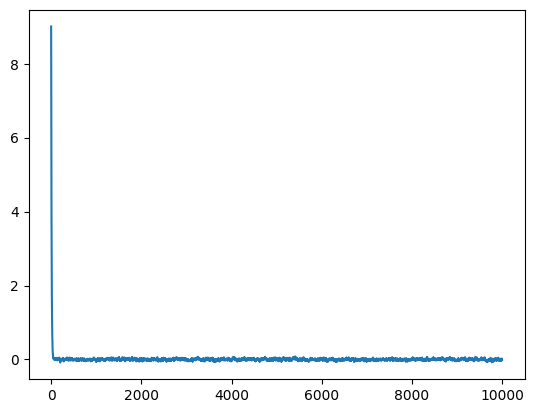

In [49]:
fig: Figure = plt.figure()
ax: Axes = fig.subplots()
num_points = 10000
y = np.random.randn(num_points) * 0.1
x = np.arange(num_points)
theta_plt = []
theta = 10
for i in range(num_points):
    theta = theta + 0.1 * (y[i] - theta)
    theta_plt.append(theta)
ax.plot(x, theta_plt)

<h1> Cliff Environment </h1>

In [135]:

from gymnasium.wrappers.compatibility import LegacyEnv


class CliffEnv(LegacyEnv):
    def __init__(self):
        self.height = 4
        self.width = 12
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.height),
            spaces.Discrete(self.width)
        ))
        self.moves = {
            0: (-1, 0),  # up
            1: (0, 1),  # right
            2: (1, 0),  # down
            3: (0, -1),  # left
        }

        # begin in start state
        self.reset()

    def step(self, action):
        x, y = self.moves[action]
        self.S = self.S[0] + x, self.S[1] + y

        self.S = max(0, self.S[0]), max(0, self.S[1])
        self.S = (min(self.S[0], self.height - 1),
                  min(self.S[1], self.width - 1))

        if self.S == (self.height - 1, self.width - 1):
            return self.S, -1, True, {}
        elif self.S[1] != 0 and self.S[0] == self.height - 1:
            return self.reset(), -100, False, {}
        return self.S, -1, False, {}

    def reset(self):
        self.S = (3, 0)
        return self.S


env = CliffEnv()

<h1> SARSA </h1>

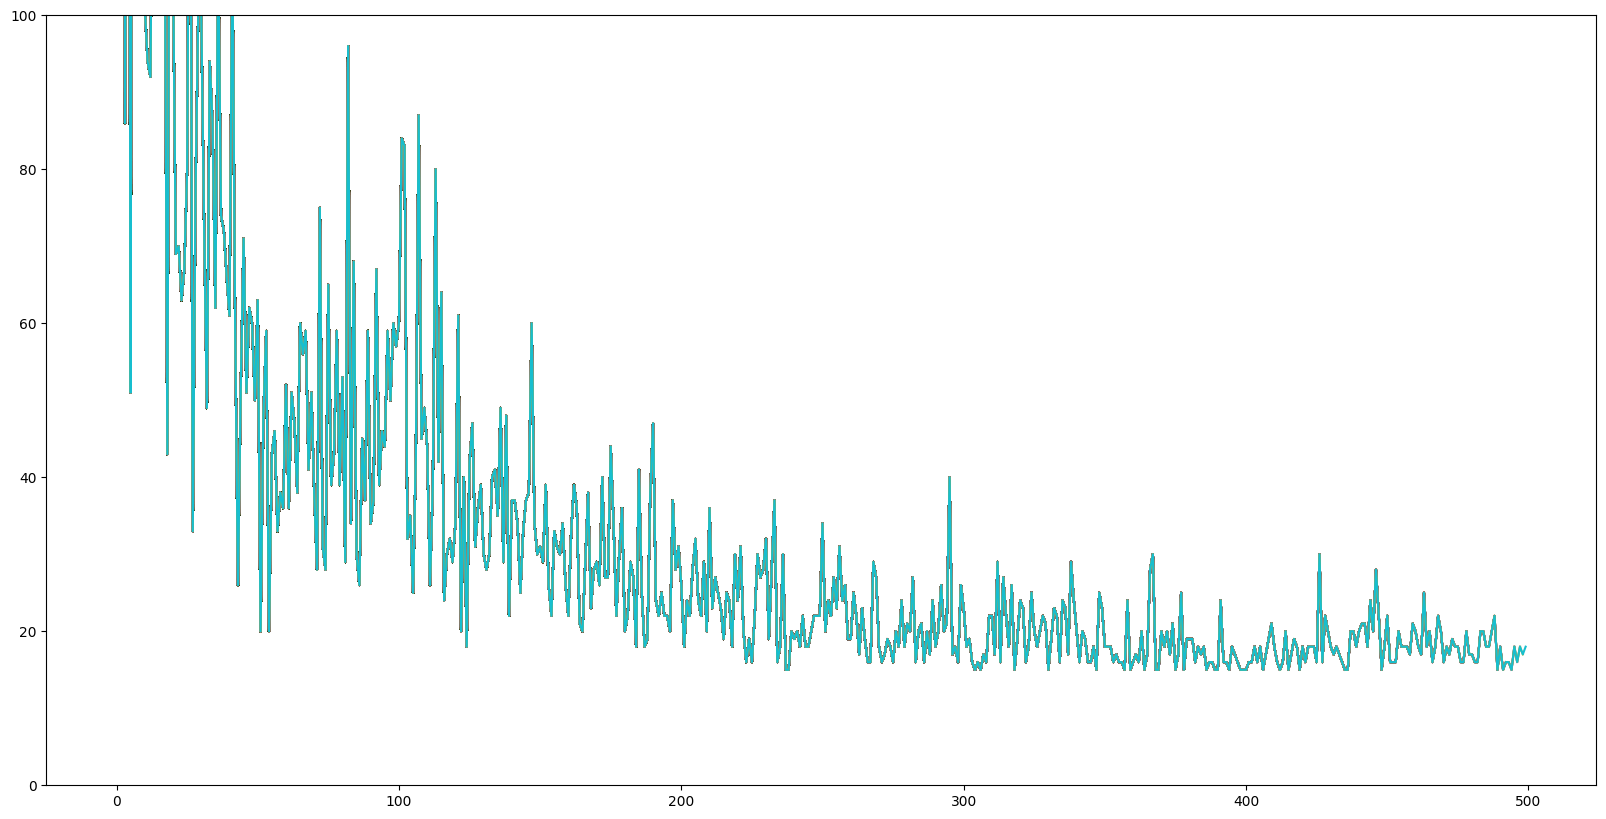

In [178]:
q = np.zeros((env.height, env.width, env.action_space.n))
epsilon = 0.1
alpha = 0.1
ep_lens = []
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0, 100)
for i in range(500):
    x, y, *_ = env.reset()
    done = False
    ep_len = 0
    action = env.action_space.sample()
    while not done:
        (x_, y_), reward, done, *_ = env.step(action)
        if np.random.rand() < epsilon:
            action_ = env.action_space.sample()
        else:
            action_ = np.argmax(q[x_][y_])
        ep_len += 1
        if not done:
            q[x][y][action] = q[x][y][action] + alpha * (reward + q[x_][y_][action_] - q[x][y][action])
        else:
            q[x][y][action] = q[x][y][action] + alpha * (reward - q[x][y][action])
        x, y = x_, y_
        action = action_
    ep_lens.append(ep_len)
    plt.plot(ep_lens)



<h1> Q-learning </h1>

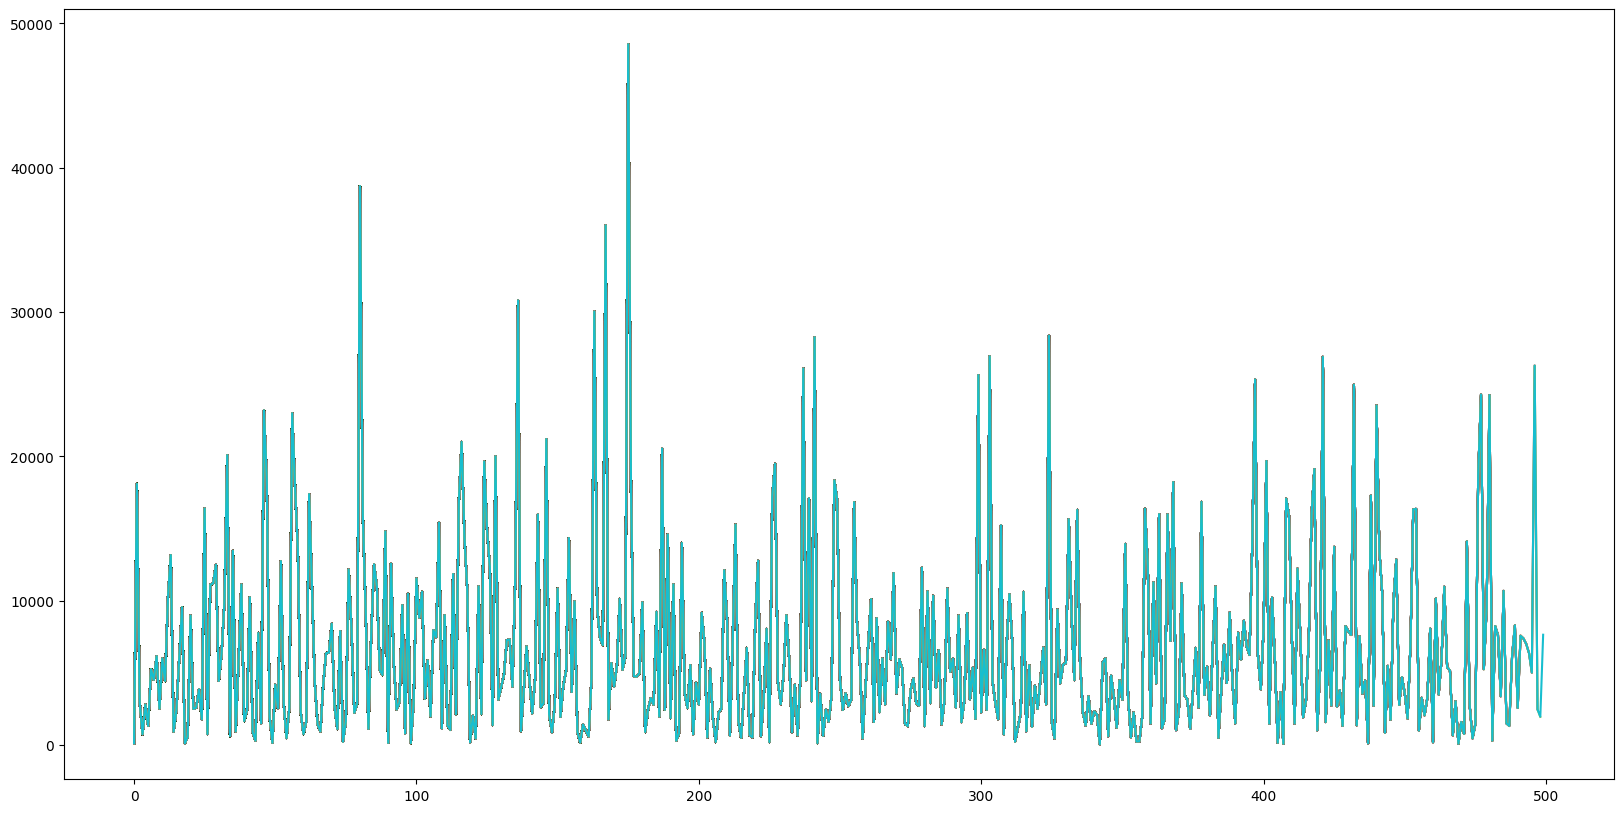

In [173]:
q = np.zeros((env.height, env.width, env.action_space.n))
alpha = 0.1
ep_lens = []
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(500):
    x, y, *_ = env.reset()
    done = False
    ep_len = 0
    while not done:
        action = env.action_space.sample()
        (x_, y_), reward, done, *_ = env.step(action)
        action_ = np.argmax(q[x_][y_])
        ep_len += 1
        if not done:
            q[x][y][action] = q[x][y][action] + alpha * (reward + q[x_][y_][action_] - q[x][y][action])
        else:
            q[x][y][action] = q[x][y][action] + alpha * (reward - q[x][y][action])
        x, y = x_, y_
    ep_lens.append(ep_len)
    plt.plot(ep_lens)



In [180]:
ep_len = 0
x, y, *_ = env.reset()
for i in range(100):
    action = np.argmax(q[x][y])
    (x_, y_), reward, done, *_ = env.step(action)
    ep_len += 1
    x, y = x_, y_
    if done:
        break
print("Eval ep len=", ep_len)

Eval ep len= 15
